In [6]:
%load_ext autoreload|
%autoreload 2

ModuleNotFoundError: No module named 'autoreload|'

In [1]:
import json
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from IPython.display import JSON
from utils import (output_variables_table,
                   print_table,
                   mfp_mapping_dict,
                   USER_ID,
                   DATE,
                   ENTRIES,
                   SUMMARY,
                   COLUMNS,
                   COUNT,
                   LEN,
                   TOTAL,
                   GOAL,
                   MEAL,
                   DISHES,
                   SEQUENCE,
                   NUTRITIONS,
                   NAME,
                   VALUE,
                   NUM_LOGS,
                   INDEX,
                   CALORIES_GOAL,
                   CALORIES_TOTAL,
                   MEAL_COUNT)
from utils import MFP

In [10]:
mfp = MFP()

In [11]:
display(f"df has {len(mfp.get_df())} # of rows.")
mfp.get_df().head()

'df has 587187 # of rows.'

user_id,date,entries,summary
i64,datetime[μs],str,str
1,2014-09-14 00:00:00,"""[{""meal"": ""MY …","""{""total"": [{""n…"
1,2014-09-15 00:00:00,"""[{""meal"": ""MY …","""{""total"": [{""n…"
1,2014-09-16 00:00:00,"""[{""meal"": ""MY …","""{""total"": [{""n…"
1,2014-09-17 00:00:00,"""[{""meal"": ""MY …","""{""total"": [{""n…"
1,2014-09-18 00:00:00,"""[{""meal"": ""MY …","""{""total"": [{""n…"


In [141]:
print(f"{mfp.get_df()[DATE].min()}\n{mfp.get_df()[DATE].max()}")

2014-09-14 00:00:00
2015-04-09 00:00:00


In [142]:
desc_df = output_variables_table(mfp.get_df(), mfp_mapping_dict).drop("min", "max")
print_table(desc_df)

statistic,type,count,null_count,mean,std,25%,50%,75%,description
str,str,str,str,str,str,str,str,str,str
"""user_id""","""int""","""587187.0""","""0.0""","""4946.919608233834""","""2844.724721894155""","""2513.0""","""4928.0""","""7427.0""","""unique identifier of each user"""
"""date""","""string""","""587187""","""0""","""2015-01-02 01:00:17.197256""",null,"""2014-11-17 00:00:00""","""2015-01-10 00:00:00""","""2015-02-15 00:00:00""","""date of log (no 24-hour clock time)"""
"""entries""","""string (can be loaded as JSON)""","""587187""","""0""",null,null,null,null,null,"""meals & dishes (with nutrition info) the user consumed"""
"""summary""","""string (can be loaded as JSON)""","""587187""","""0""",null,null,null,null,null,"""goal and total (true consumption)"""


## Exploratory Data Analysis

### Variables

user_id: [187, 186, 186, 186, 185, 185, 185, 184, 184, 183, 182, 182, 182, 182, 182, 181, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
date: [4531, 4474, 4462, 4458, 4454, 4436, 4427, 4400, 4395, 4381, 4379, 4353, 4347, 4336, 4335, 4330, 4325, 4298, 4286, 4279, 4247, 4240, 4226, 4217, 4214, 4207, 4182, 4168, 4155, 4142, 4118, 4100, 4091, 4086, 4085, 4069, 4068, 4028, 4022, 4012, 4003, 3993, 3979, 3953, 3893, 3813, 3772, 3733, 3733, 3731]
entries: [104, 97, 69, 64, 60, 54, 53, 47, 46, 44, 43, 42, 41, 39, 38, 38, 38, 38, 35, 34, 32, 29, 29, 29, 28, 28, 27, 27, 27, 27, 27, 27, 25, 24, 24, 24, 24, 23, 23, 23, 23, 23, 22, 21, 21, 21, 21, 21, 20, 20]
summary: [97, 95, 62, 53, 46, 44, 37, 35, 33, 29, 29, 26, 25, 25, 25, 25, 24, 24, 24, 24, 23, 23, 23, 22, 22, 21, 21, 20, 20, 20, 19, 19, 18, 18, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 15, 15, 14, 14, 14]


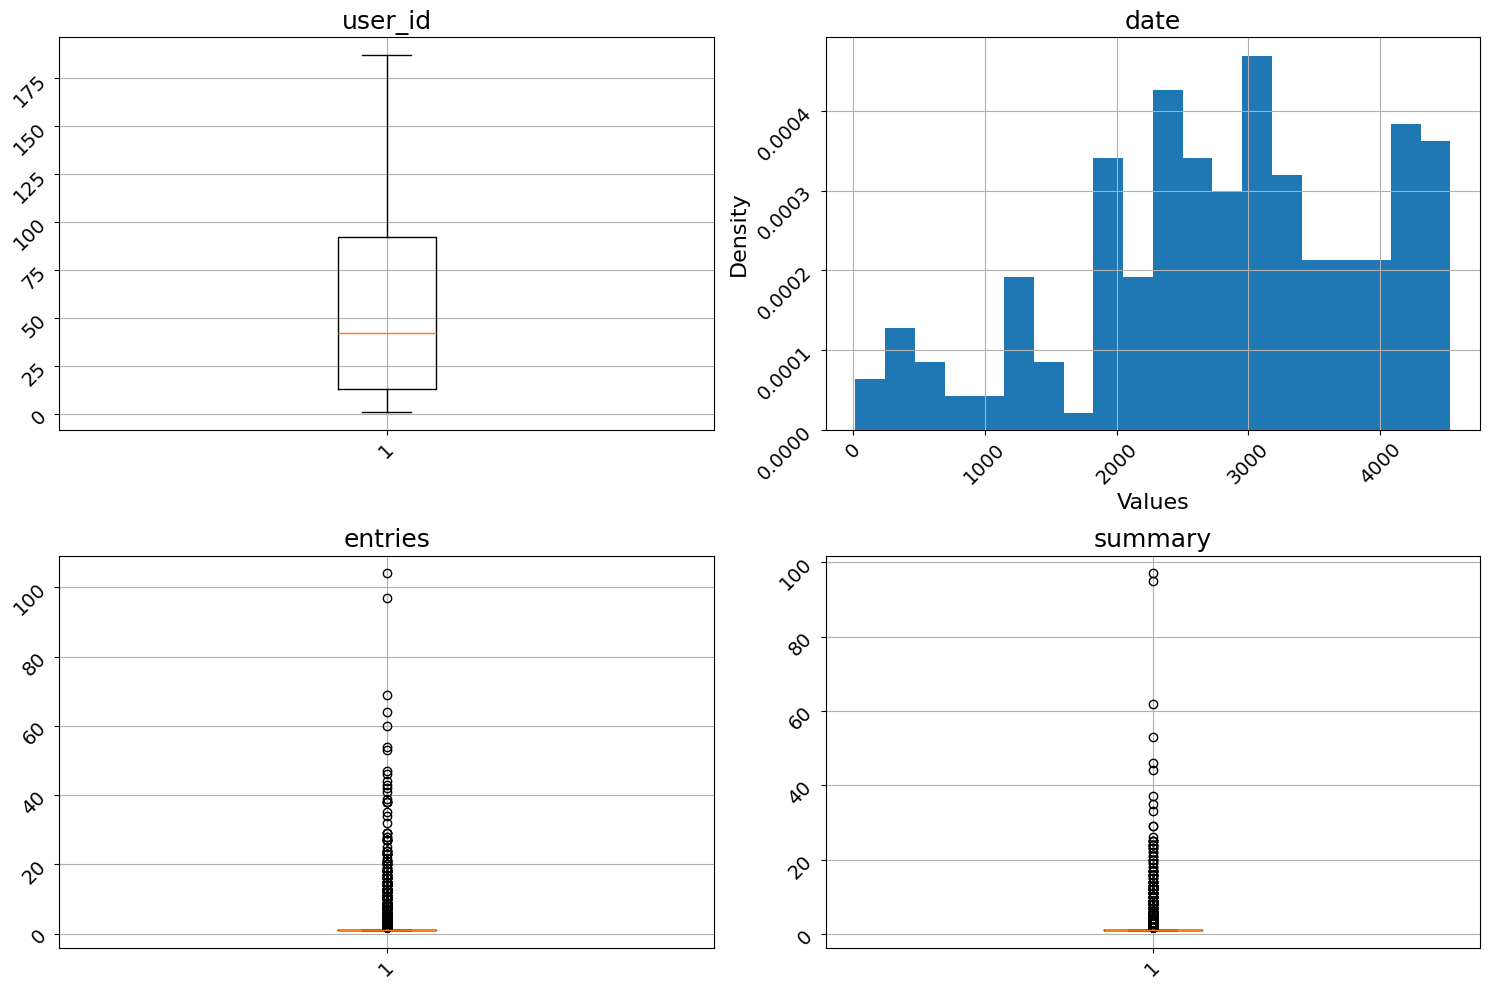

In [143]:
mfp.plot_all_columns(top_n = 10)

In [144]:
pl.DataFrame(json.loads(mfp.summary_vc.item(0,0))).transpose()

column_0,column_1,column_2,column_3,column_4,column_5
struct[2],struct[2],struct[2],struct[2],struct[2],struct[2]
"{""Calories"",1500}","{""Protein"",0}","{""Fat"",0}","{""Carbs"",0}","{""Sat Fat"",0}","{""Fiber"",0}"
"{""Calories"",1575}","{""Protein"",118}","{""Fat"",53}","{""Carbs"",158}","{""Sat Fat"",18}","{""Fiber"",25}"


In [214]:
obj = json.loads(mfp.entries_vc.item(0,0))
df = pl.DataFrame(obj).explode('dishes')
df

meal,dishes,sequence
str,struct[2],i64
"""Breakfast 4am …","{[{""Calories"",""80""}, {""Fiber"",""3""}, … {""Sodium"",""70""}],""Saba - Vanilla Topfast, 1 scoop/packet""}",1
"""Breakfast 4am …","{[{""Calories"",""130""}, {""Fiber"",""0""}, … {""Sodium"",""130""}],""Dean's - 2% Reduced Fat Milk, 1 Cup (240ml)""}",1
"""Breakfast 4am …","{[{""Calories"",""190""}, {""Fiber"",""2""}, … {""Sodium"",""150""}],""Skippy® - Creamy Peanut Butter, 2 Tbsp""}",1
"""Lunch 11am - 1…","{[{""Calories"",""80""}, {""Fiber"",""3""}, … {""Sodium"",""70""}],""Saba - Vanilla Topfast, 1 scoop/packet""}",3
"""Lunch 11am - 1…","{[{""Calories"",""130""}, {""Fiber"",""0""}, … {""Sodium"",""130""}],""Dean's - 2% Reduced Fat Milk, 1 Cup (240ml)""}",3
"""Lunch 11am - 1…","{[{""Calories"",""190""}, {""Fiber"",""2""}, … {""Sodium"",""150""}],""Skippy® - Creamy Peanut Butter, 2 Tbsp""}",3
"""Dinner 4pm-6pm…","{[{""Calories"",""80""}, {""Fiber"",""3""}, … {""Sodium"",""70""}],""Saba - Vanilla Topfast, 1 scoop/packet""}",5
"""Dinner 4pm-6pm…","{[{""Calories"",""130""}, {""Fiber"",""0""}, … {""Sodium"",""130""}],""Dean's - 2% Reduced Fat Milk, 1 Cup (240ml)""}",5
"""Dinner 4pm-6pm…","{[{""Calories"",""190""}, {""Fiber"",""2""}, … {""Sodium"",""150""}],""Skippy® - Creamy Peanut Butter, 2 Tbsp""}",5


In [215]:
obj = df.item(0,1)
pl.DataFrame(obj[NUTRITIONS]).with_columns(
    pl.col("value").cast(pl.Int32).alias(NUTRITIONS),
    ).select(["name", NUTRITIONS])

name,nutritions
str,i32
"""Calories""",80
"""Fiber""",3
"""Fat""",15
"""Protein""",8
"""Sodium""",70


## Find # of users with $> 1$ log

In [216]:
user_id_vc = mfp.df[USER_ID].value_counts(sort=True)
first_vc_one = user_id_vc[COUNT].to_list().index(1)
print(f"The dataframe has {first_vc_one} users that have >1 data log.")

The dataframe has 9474 users that have >1 data log.


## First filter for the `top_k` users

In [235]:
top_k = 100
mfp.filtered_df = mfp.filter_most_freq_users(top_k)
mfp.filtered_df

user_id,date,entries,summary
i64,datetime[μs],str,str
31,2014-09-14 00:00:00,"""[{""meal"": ""6AM…","""{""total"": [{""n…"
31,2014-09-15 00:00:00,"""[{""meal"": ""6AM…","""{""total"": [{""n…"
31,2014-09-16 00:00:00,"""[{""meal"": ""6AM…","""{""total"": [{""n…"
31,2014-09-17 00:00:00,"""[{""meal"": ""6AM…","""{""total"": [{""n…"
31,2014-09-18 00:00:00,"""[{""meal"": ""6AM…","""{""total"": [{""n…"
…,…,…,…
9711,2015-04-05 00:00:00,"""[{""meal"": ""Bre…","""{""total"": [{""n…"
9711,2015-04-06 00:00:00,"""[{""meal"": ""Bre…","""{""total"": [{""n…"
9711,2015-04-07 00:00:00,"""[{""meal"": ""Bre…","""{""total"": [{""n…"


## Find frequency of logs (among `top_k` users)

### Output a dataframe with columns `user_id`, `earliest_log`, `latest_log`, `avg_log_time_diff`, `stdev_log_time_diff`.

In [236]:
df = mfp.filtered_df.to_pandas()
df[DATE] = pd.to_datetime(df[DATE])
df = df.sort_values(by=DATE)
df['diff'] = df.groupby(USER_ID)[DATE].diff()
df = df.dropna(subset=['diff'])

stats_df = df.groupby('user_id').agg({
    DATE: [
        ('earliest_log', 'min'),
        ('latest_log', 'max')
    ],
    'diff': [
        ('average_diff_seconds', lambda x: x.dt.total_seconds().mean()),
        ('median_diff_seconds', lambda x: x.dt.total_seconds().median()),
        ('std_deviation_seconds', lambda x: x.dt.total_seconds().std())
    ]
}).reset_index()
stats_df.columns = [USER_ID] + [col[1] for col in stats_df.columns[1:]]
stats_df


,user_id,earliest_log,latest_log,average_diff_seconds,median_diff_seconds,std_deviation_seconds
0,31,2014-09-15,2015-03-12,86400.0,86400.0,0.0
1,479,2014-09-22,2015-03-19,86400.0,86400.0,0.0
2,501,2014-09-22,2015-03-19,86400.0,86400.0,0.0
3,574,2014-09-22,2015-03-19,86400.0,86400.0,0.0
4,732,2014-09-24,2015-03-21,86400.0,86400.0,0.0
...,...,...,...,...,...,...
95,9440,2014-10-11,2015-04-07,86400.0,86400.0,0.0
96,9590,2014-10-12,2015-04-08,86400.0,86400.0,0.0
97,9623,2014-10-13,2015-04-09,86400.0,86400.0,0.0
98,9705,2014-10-13,2015-04-09,86400.0,86400.0,0.0


In [237]:
num_logs_df = mfp.filtered_df.group_by(USER_ID).agg(pl.col(DATE).count().alias(NUM_LOGS))

In [238]:
full_stats_df = num_logs_df.to_pandas().merge(stats_df, on=USER_ID, how='left').sort_values(NUM_LOGS, ascending=False).reset_index().drop(columns=INDEX)
full_stats_df.head()

,user_id,num_logs,earliest_log,latest_log,average_diff_seconds,median_diff_seconds,std_deviation_seconds
0,4293,187,2014-09-27,2015-03-31,86400.000000,86400.0,0.000000
1,4344,186,2014-09-28,2015-04-01,86867.027027,86400.0,6352.254335
2,4402,186,2014-09-28,2015-04-01,86867.027027,86400.0,6352.254335
3,4337,186,2014-09-28,2015-04-01,86867.027027,86400.0,6352.254335
4,4386,185,2014-09-28,2015-04-01,87339.130435,86400.0,12738.985012


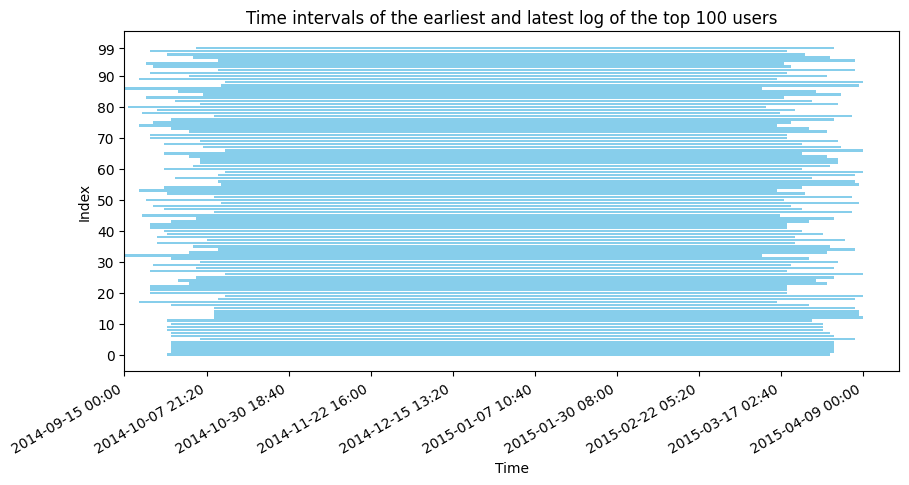

In [239]:
mfp.plot_earliest_latest_logs(full_stats_df)

## Find # of times `top_k` users meet their calorie goals

In [240]:
# first_dishes = df[DISHES].item(0)
# first_dishes

## Expand `entries` into a df

In [241]:
top_k = 100
top_k_df = mfp.filter_most_freq_users(top_k)
top_k_df

user_id,date,entries,summary
i64,datetime[μs],str,str
31,2014-09-14 00:00:00,"""[{""meal"": ""6AM…","""{""total"": [{""n…"
31,2014-09-15 00:00:00,"""[{""meal"": ""6AM…","""{""total"": [{""n…"
31,2014-09-16 00:00:00,"""[{""meal"": ""6AM…","""{""total"": [{""n…"
31,2014-09-17 00:00:00,"""[{""meal"": ""6AM…","""{""total"": [{""n…"
31,2014-09-18 00:00:00,"""[{""meal"": ""6AM…","""{""total"": [{""n…"
…,…,…,…
9739,2015-04-05 00:00:00,"""[{""meal"": ""Bre…","""{""total"": [{""n…"
9739,2015-04-06 00:00:00,"""[{""meal"": ""Bre…","""{""total"": [{""n…"
9739,2015-04-07 00:00:00,"""[{""meal"": ""Bre…","""{""total"": [{""n…"


In [242]:
expanded_df = pd.concat(
    top_k_df.to_pandas().apply(lambda row: mfp.expand_entries(row[ENTRIES], row[USER_ID], row[DATE]), axis=1).tolist(),
    ignore_index=True
)
expanded_df

,user_id,date,meal,name,Calories,Fiber,Fat,Protein,Sodium,Potass.,Carbs,Sugar,Iron,Calcium,Sat Fat,Chol
0,31,2014-09-14,6AM to 9AM,"Equate Ultra - Weightloss Shake, 11 FL OZ",190,5,6,10,180,670,NaN,NaN,NaN,NaN,NaN,NaN
1,31,2014-09-14,6AM to 9AM,"Bacon Turkey - Oscar Mayer - Bacon, 1 slice (15g)",35,0,3,3,140,0,NaN,NaN,NaN,NaN,NaN,NaN
2,31,2014-09-14,6AM to 9AM,"Sunny Meadow - Large Egg, Scrambled, 1 egg",70,0,5,5,70,70,NaN,NaN,NaN,NaN,NaN,NaN
3,31,2014-09-14,6AM to 9AM,Nature's Own Healthy Multi-Grain - Sandwich Ro...,100,4,1,4,170,0,NaN,NaN,NaN,NaN,NaN,NaN
4,31,2014-09-14,9AM to 12PM,"Mcdonald's - Big Mac, 211 g. (7.4 oz.)",530,3,27,24,960,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270645,9739,2015-04-09,Lunch,"Strawberries - Raw, 60.0 g",19,1,0,0,1,NaN,5,NaN,NaN,NaN,NaN,NaN
270646,9739,2015-04-09,Lunch,"Stop & Shop - Nonfat Greek Yogurt Plain 5.3, 5...",80,0,0,15,60,NaN,6,NaN,NaN,NaN,NaN,NaN
270647,9739,2015-04-09,Lunch,Toufayan Bakeries - Smart Pocket 100% Whole Wh...,80,4,1,5,85,NaN,16,NaN,NaN,NaN,NaN,NaN
270648,9739,2015-04-09,Dinner,"4/5 sc salsa chicken shred, 1 serving(s)",185,1,2,35,130,NaN,5,NaN,NaN,NaN,NaN,NaN


In [243]:
expanded_df.columns

Index(['user_id', 'date', 'meal', 'name', 'Calories', 'Fiber', 'Fat',
       'Protein', 'Sodium', 'Potass.', 'Carbs', 'Sugar', 'Iron', 'Calcium',
       'Sat Fat', 'Chol'],
      dtype='object')

In [244]:
expanded_df[MEAL].value_counts(sort=True)

meal
Breakfast                       55292
Lunch                           49203
Dinner                          48331
Snacks                          30034
Snack                            3081
                                ...  
Graze                              27
misc                               23
Rando Food I Put in My Mouth       11
Brunch                             10
Calorie adjustments                 8
Name: count, Length: 158, dtype: int64

In [245]:
expanded_df[MEAL].unique()

array(['6AM to 9AM', '9AM to 12PM', '12PM to 3PM', '3PM to 6PM',
       '6PM to 9PM', 'Supplements', 'Breakfast', 'Morning Snack', 'Lunch',
       'Dinner', 'Afternoon Snack', 'Evening Snack', 'Snacks',
       'Morning Snacks', 'Afternon Snacks', 'Evening Snacks',
       '6AM to 10AM', '10AM to 2PM', '6PM to 10PM', '2PM to 6PM',
       'Fruit, Nuts & Snacks', 'Coffee', 'Dessert', 'Post -workout',
       'Teatime', 'Pre-workout', 'snacks', 'drinks', 'Mid Morning',
       'Pre workout', 'Post workout', 'Dinner/snack before bed', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'a.m.', 'noon-4', '4-7', 'after 7',
       'Early Snack', 'Post Workout Snack', 'Snack', 'Afternoon snack',
       'PM snack/Dessert', 'AM snack', '1', '2', '3', '4', '5', '6',
       'Nomnoms at Night', 'Vitamins', 'mid-morning snack',
       'Mid-Afternoon Snacks', '10am Snack', '4pm Snack', 'Drinks',
       'Pre and post workout', '9 - 10 AM', '11 - 12 PM', '4 - 8 PM',
       'Other', '1 - 3 PM', 'Extras', 'A.M. Snack

## Expand `summary` column (output has same # of rows as input)

In [246]:
summary_expanded_df = top_k_df.to_pandas().apply(lambda row: mfp.expand_summary(row[SUMMARY], row[USER_ID]), axis=1)
user_id_col = summary_expanded_df.pop(USER_ID).astype(int)  # pandas converts USER_ID to float without specification
summary_expanded_df.insert(0, USER_ID, user_id_col)
summary_expanded_df

name,user_id,Calcium_goal,Calcium_total,Calories_goal,Calories_total,Carbs_goal,Carbs_total,Chol_goal,Chol_total,Fat_goal,...,Potass._goal,Potass._total,Protein_goal,Protein_total,Sat Fat_goal,Sat Fat_total,Sodium_goal,Sodium_total,Sugar_goal,Sugar_total
0,31,NaN,NaN,1910.0,1688.0,NaN,NaN,NaN,NaN,64.0,...,3500.0,1758.0,96.0,84.0,NaN,NaN,2300.0,2142.0,NaN,NaN
1,31,NaN,NaN,2718.0,1995.0,NaN,NaN,NaN,NaN,91.0,...,3500.0,2200.0,137.0,59.0,NaN,NaN,2300.0,3036.0,NaN,NaN
2,31,NaN,NaN,2756.0,1844.0,NaN,NaN,NaN,NaN,92.0,...,3500.0,1866.0,138.0,60.0,NaN,NaN,2300.0,1129.0,NaN,NaN
3,31,NaN,NaN,2340.0,2173.0,NaN,NaN,NaN,NaN,78.0,...,3500.0,801.0,117.0,68.0,NaN,NaN,2300.0,3324.0,NaN,NaN
4,31,NaN,NaN,2755.0,1835.0,NaN,NaN,NaN,NaN,92.0,...,3500.0,670.0,138.0,106.0,NaN,NaN,2300.0,3090.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18057,9739,NaN,NaN,2985.0,3273.0,299.0,521.0,NaN,NaN,100.0,...,NaN,NaN,223.0,156.0,NaN,NaN,2300.0,2291.0,NaN,NaN
18058,9739,NaN,NaN,2848.0,3013.0,285.0,500.0,NaN,NaN,96.0,...,NaN,NaN,213.0,235.0,NaN,NaN,2300.0,1773.0,NaN,NaN
18059,9739,NaN,NaN,2972.0,3215.0,297.0,546.0,NaN,NaN,100.0,...,NaN,NaN,222.0,183.0,NaN,NaN,2300.0,1964.0,NaN,NaN
18060,9739,NaN,NaN,2792.0,2154.0,279.0,349.0,NaN,NaN,94.0,...,NaN,NaN,209.0,128.0,NaN,NaN,2300.0,1553.0,NaN,NaN


In [247]:
df_with_summary_expanded = pd.concat([top_k_df.to_pandas(), summary_expanded_df], axis=1)
df_with_summary_expanded 

,user_id,date,entries,summary,user_id,Calcium_goal,Calcium_total,Calories_goal,Calories_total,Carbs_goal,...,Potass._goal,Potass._total,Protein_goal,Protein_total,Sat Fat_goal,Sat Fat_total,Sodium_goal,Sodium_total,Sugar_goal,Sugar_total
0,31,2014-09-14,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1688}...",31,NaN,NaN,1910.0,1688.0,NaN,...,3500.0,1758.0,96.0,84.0,NaN,NaN,2300.0,2142.0,NaN,NaN
1,31,2014-09-15,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1995}...",31,NaN,NaN,2718.0,1995.0,NaN,...,3500.0,2200.0,137.0,59.0,NaN,NaN,2300.0,3036.0,NaN,NaN
2,31,2014-09-16,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1844}...",31,NaN,NaN,2756.0,1844.0,NaN,...,3500.0,1866.0,138.0,60.0,NaN,NaN,2300.0,1129.0,NaN,NaN
3,31,2014-09-17,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 2173}...",31,NaN,NaN,2340.0,2173.0,NaN,...,3500.0,801.0,117.0,68.0,NaN,NaN,2300.0,3324.0,NaN,NaN
4,31,2014-09-18,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1835}...",31,NaN,NaN,2755.0,1835.0,NaN,...,3500.0,670.0,138.0,106.0,NaN,NaN,2300.0,3090.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18057,9739,2015-04-05,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 3273}...",9739,NaN,NaN,2985.0,3273.0,299.0,...,NaN,NaN,223.0,156.0,NaN,NaN,2300.0,2291.0,NaN,NaN
18058,9739,2015-04-06,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 3013}...",9739,NaN,NaN,2848.0,3013.0,285.0,...,NaN,NaN,213.0,235.0,NaN,NaN,2300.0,1773.0,NaN,NaN
18059,9739,2015-04-07,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 3215}...",9739,NaN,NaN,2972.0,3215.0,297.0,...,NaN,NaN,222.0,183.0,NaN,NaN,2300.0,1964.0,NaN,NaN
18060,9739,2015-04-08,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 2154}...",9739,NaN,NaN,2792.0,2154.0,279.0,...,NaN,NaN,209.0,128.0,NaN,NaN,2300.0,1553.0,NaN,NaN


## Find frequency of users meeting calorie goal in `summary`

In [128]:
beat_goals = (df_with_summary_expanded[CALORIES_GOAL] > df_with_summary_expanded[CALORIES_TOTAL]).sum()
display(f"top 100 users met their calorie goals {beat_goals.sum()} out of {len(df_with_summary_expanded)} times, or {beat_goals.sum()/len(df_with_summary_expanded)*100:.2f}% of the time")

'top 100 users met their calorie goals 12945 out of 18062 times, or 71.67% of the time'

## Find # of meals users had each day

In [207]:
top_k_meal_counts = expanded_df.groupby([USER_ID, DATE]).size().reset_index(name=MEAL_COUNT).sort_values(by=MEAL_COUNT, ascending=False)
top_k_meal_counts

,user_id,date,meal_count
17889,9739,2014-10-19,52
17899,9739,2014-10-29,52
17918,9739,2014-11-17,51
17900,9739,2014-10-30,50
17898,9739,2014-10-28,50
...,...,...,...
17672,9705,2015-03-11,1
17671,9705,2015-03-10,1
17670,9705,2015-03-09,1
17669,9705,2015-03-08,1


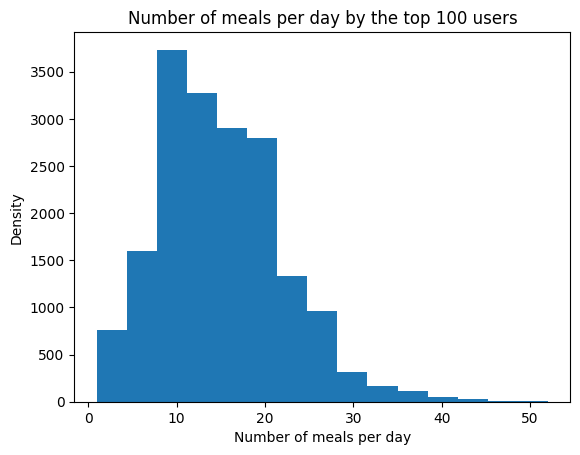

In [130]:
plt.hist(top_k_meal_counts[MEAL_COUNT], bins=15)
plt.title(f"Number of meals per day by the top {top_k} users")
plt.xlabel("Number of meals per day")
plt.ylabel("Density")
plt.show()

## Emulate the study in (Gordon et al, 2019) where the first 7 days of logs can predict the goal reaching

## Find frequency of time (e.g. 4-6pm) being specified in `meals`

json.loads(top_k_df[SUMMARY][0])

## Create expanded table entries for October 28th

In [262]:
# Drop duplicate columns
df = df_with_summary_expanded.loc[:, ~df_with_summary_expanded.columns.duplicated()]
df

,user_id,date,entries,summary,Calcium_goal,Calcium_total,Calories_goal,Calories_total,Carbs_goal,Carbs_total,...,Potass._goal,Potass._total,Protein_goal,Protein_total,Sat Fat_goal,Sat Fat_total,Sodium_goal,Sodium_total,Sugar_goal,Sugar_total
0,31,2014-09-14,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1688}...",NaN,NaN,1910.0,1688.0,NaN,NaN,...,3500.0,1758.0,96.0,84.0,NaN,NaN,2300.0,2142.0,NaN,NaN
1,31,2014-09-15,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1995}...",NaN,NaN,2718.0,1995.0,NaN,NaN,...,3500.0,2200.0,137.0,59.0,NaN,NaN,2300.0,3036.0,NaN,NaN
2,31,2014-09-16,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1844}...",NaN,NaN,2756.0,1844.0,NaN,NaN,...,3500.0,1866.0,138.0,60.0,NaN,NaN,2300.0,1129.0,NaN,NaN
3,31,2014-09-17,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 2173}...",NaN,NaN,2340.0,2173.0,NaN,NaN,...,3500.0,801.0,117.0,68.0,NaN,NaN,2300.0,3324.0,NaN,NaN
4,31,2014-09-18,"[{""meal"": ""6AM to 9AM"", ""dishes"": [{""nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1835}...",NaN,NaN,2755.0,1835.0,NaN,NaN,...,3500.0,670.0,138.0,106.0,NaN,NaN,2300.0,3090.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18057,9739,2015-04-05,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 3273}...",NaN,NaN,2985.0,3273.0,299.0,521.0,...,NaN,NaN,223.0,156.0,NaN,NaN,2300.0,2291.0,NaN,NaN
18058,9739,2015-04-06,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 3013}...",NaN,NaN,2848.0,3013.0,285.0,500.0,...,NaN,NaN,213.0,235.0,NaN,NaN,2300.0,1773.0,NaN,NaN
18059,9739,2015-04-07,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 3215}...",NaN,NaN,2972.0,3215.0,297.0,546.0,...,NaN,NaN,222.0,183.0,NaN,NaN,2300.0,1964.0,NaN,NaN
18060,9739,2015-04-08,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 2154}...",NaN,NaN,2792.0,2154.0,279.0,349.0,...,NaN,NaN,209.0,128.0,NaN,NaN,2300.0,1553.0,NaN,NaN


In [249]:
def safe_json_loads(value):
    if isinstance(value, str):
        return json.loads(value)
    return value  

In [265]:
# convert string to dict
df['entries'] = df['entries'].apply(json.loads)

expanded_rows = []
nutrient_columns = [col for col in df.columns if col.endswith('_goal') or col.endswith('_total')]

for _, row in df.iterrows():
    user_id = row['user_id']
    date = row['date']
    meal_id = 1  # reset for new user

    for meal in row['entries']:
        meal_name = meal['meal']  # Time of the meal
        
        dish_details = []
        
        for dish in meal.get('dishes', []):
            dish_name = dish.get('name', 'Unknown Dish')
            dish_nutritions = {nut['name']: nut['value'] for nut in dish.get('nutritions', [])}
            # keep dish deets
            dish_details.append({
                "dish_name": dish_name,
                **dish_nutritions 
            })
        
        dishes_json = json.dumps(dish_details)
        
        nutrient_data = {col: row[col] for col in nutrient_columns}

        expanded_rows.append({
            'user_id': user_id,
            'date': date,
            'meal_id': meal_id,
            'meal_time': meal_name,
            'dish_details': dishes_json,  # JSON string of all dish details
            **nutrient_data  # Unpack all nutrient goals and totals from the row
        })
        meal_id += 1

meal_df = pd.DataFrame(expanded_rows)

In [266]:
# desired format  - complex weird series like right now
meal_df['user_id'] = meal_df['user_id'].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) else x)

In [267]:
meal_df

,user_id,date,meal_id,meal_time,dish_details,Calcium_goal,Calcium_total,Calories_goal,Calories_total,Carbs_goal,...,Potass._goal,Potass._total,Protein_goal,Protein_total,Sat Fat_goal,Sat Fat_total,Sodium_goal,Sodium_total,Sugar_goal,Sugar_total
0,31,2014-09-14,1,6AM to 9AM,"[{""dish_name"": ""Equate Ultra - Weightloss Shak...",NaN,NaN,1910.0,1688.0,NaN,...,3500.0,1758.0,96.0,84.0,NaN,NaN,2300.0,2142.0,NaN,NaN
1,31,2014-09-14,2,9AM to 12PM,"[{""dish_name"": ""Mcdonald's - Big Mac, 211 g. (...",NaN,NaN,1910.0,1688.0,NaN,...,3500.0,1758.0,96.0,84.0,NaN,NaN,2300.0,2142.0,NaN,NaN
2,31,2014-09-14,3,12PM to 3PM,"[{""dish_name"": ""Panamei Seafood - Frozen Tilap...",NaN,NaN,1910.0,1688.0,NaN,...,3500.0,1758.0,96.0,84.0,NaN,NaN,2300.0,2142.0,NaN,NaN
3,31,2014-09-14,4,3PM to 6PM,"[{""dish_name"": ""Yellow Tail - Cabernet Sauvign...",NaN,NaN,1910.0,1688.0,NaN,...,3500.0,1758.0,96.0,84.0,NaN,NaN,2300.0,2142.0,NaN,NaN
4,31,2014-09-15,1,6AM to 9AM,"[{""dish_name"": ""Great Value - 100% Pure Orange...",NaN,NaN,2718.0,1995.0,NaN,...,3500.0,2200.0,137.0,59.0,NaN,NaN,2300.0,3036.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74854,9739,2015-04-08,5,Snacks,"[{""dish_name"": ""Whole Foods/Dancing Deer - Cho...",NaN,NaN,2792.0,2154.0,279.0,...,NaN,NaN,209.0,128.0,NaN,NaN,2300.0,1553.0,NaN,NaN
74855,9739,2015-04-08,6,Candy,"[{""dish_name"": ""Reese's - Mini Pb Cups, 1 piec...",NaN,NaN,2792.0,2154.0,279.0,...,NaN,NaN,209.0,128.0,NaN,NaN,2300.0,1553.0,NaN,NaN
74856,9739,2015-04-09,1,Breakfast,"[{""dish_name"": ""00 Daily Vitamins, 1 serving(s...",NaN,NaN,1444.0,661.0,144.0,...,NaN,NaN,108.0,83.0,NaN,NaN,2300.0,435.0,NaN,NaN
74857,9739,2015-04-09,2,Lunch,"[{""dish_name"": ""Bulk Organic - Steel Cut Oats,...",NaN,NaN,1444.0,661.0,144.0,...,NaN,NaN,108.0,83.0,NaN,NaN,2300.0,435.0,NaN,NaN


## Streak calculation - Max number of consecutive entries

In [277]:
df.head()

,user_id,date,entries,summary,Calcium_goal,Calcium_total,Calories_goal,Calories_total,Carbs_goal,Carbs_total,...,Potass._total,Protein_goal,Protein_total,Sat Fat_goal,Sat Fat_total,Sodium_goal,Sodium_total,Sugar_goal,Sugar_total,streak
0,31,2014-09-14,"[{'meal': '6AM to 9AM', 'dishes': [{'nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1688}...",NaN,NaN,1910.0,1688.0,NaN,NaN,...,1758.0,96.0,84.0,NaN,NaN,2300.0,2142.0,NaN,NaN,0
1,31,2014-09-15,"[{'meal': '6AM to 9AM', 'dishes': [{'nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1995}...",NaN,NaN,2718.0,1995.0,NaN,NaN,...,2200.0,137.0,59.0,NaN,NaN,2300.0,3036.0,NaN,NaN,1
2,31,2014-09-16,"[{'meal': '6AM to 9AM', 'dishes': [{'nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1844}...",NaN,NaN,2756.0,1844.0,NaN,NaN,...,1866.0,138.0,60.0,NaN,NaN,2300.0,1129.0,NaN,NaN,2
3,31,2014-09-17,"[{'meal': '6AM to 9AM', 'dishes': [{'nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 2173}...",NaN,NaN,2340.0,2173.0,NaN,NaN,...,801.0,117.0,68.0,NaN,NaN,2300.0,3324.0,NaN,NaN,3
4,31,2014-09-18,"[{'meal': '6AM to 9AM', 'dishes': [{'nutrition...","{""total"": [{""name"": ""Calories"", ""value"": 1835}...",NaN,NaN,2755.0,1835.0,NaN,NaN,...,670.0,138.0,106.0,NaN,NaN,2300.0,3090.0,NaN,NaN,4


In [291]:
df['date'] = pd.to_datetime(df['date'])

df = df.sort_values(by=['user_id', 'date'])

# shift by 1, subtract for consecutive, we know diff of 1 is a streak
df['streak'] = (df['date'] - df['date'].shift()).dt.days.ne(1).cumsum()

# Group by user_id and streak to find streak periods
streaks = df.groupby(['user_id', 'streak']).agg(
    start_date=('date', 'min'),
    end_date=('date', 'max'),
    streak_length=('date', 'count')
).reset_index()
streaks_df = streaks.drop('streak', axis=1)

In [293]:
streaks_df.head()

,user_id,start_date,end_date,streak_length
0,31,2014-09-14,2015-03-12,180
1,479,2014-09-21,2015-03-19,180
2,501,2014-09-21,2015-03-19,180
3,574,2014-09-21,2015-03-19,180
4,732,2014-09-23,2015-03-21,180


In [292]:
sum(streaks_df['streak_length'])

18062

In [1]:
streaks_df.value_counts()

NameError: name 'streaks_df' is not defined